In [0]:
import pandas as pd

## Code to read csv file into colaboratory


In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
id='1qmoWVr61kxpKXnF2PzE1LJzjSmVMx-fQ'

## Load dataset in df variable using pandas library

In [4]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train.csv')  
df = pd.read_csv('train.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,4,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.head()

,ID,vendor+AF8-id,pickup+AF8-loc,drop+AF8-loc,driver+AF8-tip,mta+AF8-tax,distance,pickup+AF8-time,drop+AF8-time,num+AF8-passengers,toll+AF8-amount,payment+AF8-method,rate+AF8-code,stored+AF8-flag,extra+AF8-charges,improvement+AF8-charge,total+AF8-amount
0,0,1,170.0,233.0,1.83,0.5,0.70,04/04/2017 05:59:43 PM,04/04/2017 06:05:04 PM,1.0,0,1.0,1.0,N,1,0.3,9.13
1,1,2,151.0,243.0,3.56,0.5,4.64,04/03/2017 07:03:34 PM,04/03/2017 07:20:04 PM,1.0,0,1.0,1.0,N,1,0.3,21.36
2,2,2,68.0,90.0,1.5,0.5,1.29,04/03/2017 03:06:13 PM,04/03/2017 03:12:30 PM,2.0,0,1.0,1.0,N,0,0.3,8.8
3,3,2,142.0,234.0,1.5,0.5,2.74,04/04/2017 08:10:52 AM,04/04/2017 08:27:00 AM,1.0,0,1.0,1.0,N,0,0.3,14.8
4,4,2,238.0,238.0,0,0.5,0.45,04/05/2017 02:02:59 PM,04/05/2017 02:05:41 PM,6.0,0,2.0,1.0,N,0,0.3,4.8


In [7]:
df.columns

Index(['ID', 'vendor+AF8-id', 'pickup+AF8-loc', 'drop+AF8-loc',
       'driver+AF8-tip', 'mta+AF8-tax', 'distance', 'pickup+AF8-time',
       'drop+AF8-time', 'num+AF8-passengers', 'toll+AF8-amount',
       'payment+AF8-method', 'rate+AF8-code', 'stored+AF8-flag',
       'extra+AF8-charges', 'improvement+AF8-charge', 'total+AF8-amount'],
      dtype='object')

# Info will help us to determine the data type of different columns, total number of features, total number of rows in our dataset


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
ID                        1048575 non-null int64
vendor+AF8-id             1048575 non-null object
pickup+AF8-loc            1048574 non-null float64
drop+AF8-loc              1048574 non-null float64
driver+AF8-tip            1048573 non-null object
mta+AF8-tax               1048574 non-null object
distance                  1048574 non-null float64
pickup+AF8-time           1048574 non-null object
drop+AF8-time             1048574 non-null object
num+AF8-passengers        1048574 non-null float64
toll+AF8-amount           1048573 non-null object
payment+AF8-method        1048574 non-null float64
rate+AF8-code             1048574 non-null float64
stored+AF8-flag           1048574 non-null object
extra+AF8-charges         1048574 non-null object
improvement+AF8-charge    1048573 non-null object
total+AF8-amount          1048573 non-null object
dtypes: float64(6), int64(1), ob

# describe will help us to determine about the scaling and range of our dataset

In [9]:
df.describe()

,ID,pickup+AF8-loc,drop+AF8-loc,distance,num+AF8-passengers,payment+AF8-method,rate+AF8-code
count,1.048575e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06
mean,5.242870e+05,1.648085e+02,1.626675e+02,2.859832e+00,1.590696e+00,1.317943e+00,1.043368e+00
std,3.026977e+05,6.579282e+01,6.953073e+01,3.709541e+00,1.253700e+00,4.853266e-01,5.621114e-01
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,2.621435e+05,1.250000e+02,1.130000e+02,9.300000e-01,1.000000e+00,1.000000e+00,1.000000e+00
50%,5.242870e+05,1.620000e+02,1.620000e+02,1.600000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,7.864305e+05,2.330000e+02,2.330000e+02,2.900000e+00,2.000000e+00,2.000000e+00,1.000000e+00
max,1.048574e+06,2.650000e+02,2.650000e+02,1.138000e+02,9.000000e+00,4.000000e+00,9.900000e+01


# Count of null values

In [10]:
df.isnull().sum()

ID                        0
vendor+AF8-id             0
pickup+AF8-loc            1
drop+AF8-loc              1
driver+AF8-tip            2
mta+AF8-tax               1
distance                  1
pickup+AF8-time           1
drop+AF8-time             1
num+AF8-passengers        1
toll+AF8-amount           2
payment+AF8-method        1
rate+AF8-code             1
stored+AF8-flag           1
extra+AF8-charges         1
improvement+AF8-charge    2
total+AF8-amount          2
dtype: int64

In [0]:
id1='1fv6Ip6v5maLWQFNjeNva46GhNUyvB_8F'

In [0]:
downloaded = drive.CreateFile({'id':id1}) 
downloaded.GetContentFile('test.csv')  
test = pd.read_csv('test.csv')

# Dropping few columns by simple reasoning

 Clearly ID has no relation with the final output so we drop this column from both training and testing data




In [0]:
df=df.drop('ID',axis=1)

In [0]:
test=test.drop('ID',axis=1)

In [15]:
df['pickup+AF8-time'].nunique()

323725

In [16]:
df['drop+AF8-time'].nunique()

326900

In [0]:
a=pd.to_datetime(df['pickup+AF8-time'])

In [0]:
b=pd.to_datetime(df['drop+AF8-time'])

In [0]:
c=[]

In [0]:
c1=[]

In [0]:
for key,value in a.iteritems():
  c.append((b[key]-a[key]).total_seconds()/3600)

In [0]:
d=pd.DataFrame(c)

In [15]:
d.head()

,0
0,0.089167
1,0.275000
2,0.104722
3,0.268889
4,0.045000


In [0]:
df.insert(2,'time',d)

Since count of unique values of above two columns is too large that it will cause final otput to be biased so we drop this column 

In [0]:
df=df.drop('pickup+AF8-time',axis=1)

In [0]:
df=df.drop('drop+AF8-time',axis=1)

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154235 entries, 0 to 154234
Data columns (total 15 columns):
vendor_id             154235 non-null int64
pickup_loc            154235 non-null float64
drop_loc              154235 non-null float64
driver_tip            154235 non-null float64
mta_tax               154235 non-null float64
distance              154235 non-null float64
pickup_time           154235 non-null object
drop_time             154235 non-null object
num_passengers        154235 non-null float64
toll_amount           154235 non-null float64
payment_method        154235 non-null float64
rate_code             154235 non-null float64
stored_flag           154235 non-null object
extra_charges         154235 non-null float64
improvement_charge    154235 non-null float64
dtypes: float64(11), int64(1), object(3)
memory usage: 17.7+ MB


In [0]:
a=pd.to_datetime(test['pickup_time'])

In [0]:
b=pd.to_datetime(test['drop_time'])

In [0]:
c=[]

In [0]:
c1=[]

In [0]:
for key,value in a.iteritems():
  c1.append((b[key]-a[key]).total_seconds()/3600)

In [0]:
d1=pd.DataFrame(c1)

In [0]:
test.insert(2,'time',d1)

In [0]:
test=test.drop('pickup_time',axis=1)

In [0]:
test=test.drop('drop_time',axis=1)

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154235 entries, 0 to 154234
Data columns (total 14 columns):
vendor_id             154235 non-null int64
pickup_loc            154235 non-null float64
time                  154235 non-null float64
drop_loc              154235 non-null float64
driver_tip            154235 non-null float64
mta_tax               154235 non-null float64
distance              154235 non-null float64
num_passengers        154235 non-null float64
toll_amount           154235 non-null float64
payment_method        154235 non-null float64
rate_code             154235 non-null float64
stored_flag           154235 non-null object
extra_charges         154235 non-null float64
improvement_charge    154235 non-null float64
dtypes: float64(12), int64(1), object(1)
memory usage: 16.5+ MB


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 15 columns):
vendor+AF8-id             1048575 non-null object
pickup+AF8-loc            1048574 non-null float64
time                      1048574 non-null float64
drop+AF8-loc              1048574 non-null float64
driver+AF8-tip            1048573 non-null object
mta+AF8-tax               1048574 non-null object
distance                  1048574 non-null float64
num+AF8-passengers        1048574 non-null float64
toll+AF8-amount           1048573 non-null object
payment+AF8-method        1048574 non-null float64
rate+AF8-code             1048574 non-null float64
stored+AF8-flag           1048574 non-null object
extra+AF8-charges         1048574 non-null object
improvement+AF8-charge    1048573 non-null object
total+AF8-amount          1048573 non-null object
dtypes: float64(7), object(8)
memory usage: 120.0+ MB


In [0]:
loc=df['drop+AF8-loc']-df['pickup+AF8-loc']

In [33]:
loc.head()

0    63.0
1    92.0
2    22.0
3    92.0
4     0.0
dtype: float64

In [0]:
df.insert(2,'loc',loc)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 16 columns):
vendor+AF8-id             1048575 non-null object
pickup+AF8-loc            1048574 non-null float64
loc                       1048574 non-null float64
time                      1048574 non-null float64
drop+AF8-loc              1048574 non-null float64
driver+AF8-tip            1048573 non-null object
mta+AF8-tax               1048574 non-null object
distance                  1048574 non-null float64
num+AF8-passengers        1048574 non-null float64
toll+AF8-amount           1048573 non-null object
payment+AF8-method        1048574 non-null float64
rate+AF8-code             1048574 non-null float64
stored+AF8-flag           1048574 non-null object
extra+AF8-charges         1048574 non-null object
improvement+AF8-charge    1048573 non-null object
total+AF8-amount          1048573 non-null object
dtypes: float64(8), object(8)
memory usage: 128.0+ MB


In [0]:
df=df.drop('pickup+AF8-loc',axis=1)

In [0]:
df=df.drop('drop+AF8-loc',axis=1)


In [0]:
l=test['drop_loc']-test['pickup_loc']

In [0]:
test.insert(2,'loc',l)

In [0]:
test=test.drop('pickup_loc',axis=1)

In [0]:
test=test.drop('drop_loc',axis=1)

### Since in training there are only very few rows with null values so we drop them

In [0]:
df=df.dropna()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048573 entries, 0 to 1048574
Data columns (total 14 columns):
vendor+AF8-id             1048573 non-null object
loc                       1048573 non-null float64
time                      1048573 non-null float64
driver+AF8-tip            1048573 non-null object
mta+AF8-tax               1048573 non-null object
distance                  1048573 non-null float64
num+AF8-passengers        1048573 non-null float64
toll+AF8-amount           1048573 non-null object
payment+AF8-method        1048573 non-null float64
rate+AF8-code             1048573 non-null float64
stored+AF8-flag           1048573 non-null object
extra+AF8-charges         1048573 non-null object
improvement+AF8-charge    1048573 non-null object
total+AF8-amount          1048573 non-null object
dtypes: float64(6), object(8)
memory usage: 120.0+ MB


In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154235 entries, 0 to 154234
Data columns (total 14 columns):
vendor_id             154235 non-null int64
pickup_loc            154235 non-null float64
time                  154235 non-null float64
drop_loc              154235 non-null float64
driver_tip            154235 non-null float64
mta_tax               154235 non-null float64
distance              154235 non-null float64
num_passengers        154235 non-null float64
toll_amount           154235 non-null float64
payment_method        154235 non-null float64
rate_code             154235 non-null float64
stored_flag           154235 non-null object
extra_charges         154235 non-null float64
improvement_charge    154235 non-null float64
dtypes: float64(12), int64(1), object(1)
memory usage: 16.5+ MB


We found that many columns of train and test file differ in type so we will change their type 

Also we found that some string is present along with float64 values in some columns of training data
so below code is to find out such data points and eleminate the string portion from them

In [0]:
xt=df

In [0]:
x=xt['total+AF8-amount'].astype(str)

In [0]:
for key,value in x.iteritems():
    if value.isdigit():
        None
    elif value.replace('.','',1).isdigit() and value.count('.')<2:
        None
    else:
        y=value.split('-')
        xt=xt.drop(key)

In [0]:
x=xt['improvement+AF8-charge'].astype(str)

In [0]:
for key,value in x.iteritems():
    if value.isdigit():
        None
    elif value.replace('.','',1).isdigit() and value.count('.')<2:
        None
    else:
        y=value.split('-')
        xt=xt.drop(key)

In [0]:
x=xt['extra+AF8-charges'].astype(str)

In [0]:
for key,value in x.iteritems():
    if value.isdigit():
        None
    elif value.replace('.','',1).isdigit() and value.count('.')<2:
        None
    else:
        y=value.split('-')
        xt=xt.drop(key)

In [0]:
x=xt['toll+AF8-amount'].astype(str)

In [0]:
for key,value in x.iteritems():
    if value.isdigit():
        None
    elif value.replace('.','',1).isdigit() and value.count('.')<2:
        None
    else:
        y=value.split('-')
        xt=xt.drop(key)

In [0]:
x=xt['mta+AF8-tax'].astype(str)

In [0]:
for key,value in x.iteritems():
    if value.isdigit():
        None
    elif value.replace('.','',1).isdigit() and value.count('.')<2:
        None
    else:
        y=value.split('-')
        xt=xt.drop(key)

In [0]:
x=xt['driver+AF8-tip'].astype(str)

In [0]:
for key,value in x.iteritems():
    if value.isdigit():
        None
    elif value.replace('.','',1).isdigit() and value.count('.')<2:
        None
    else:
        y=value.split('-')
        xt=xt.drop(key)

In [0]:
x=xt['vendor+AF8-id'].astype(str)

In [0]:
for key,value in x.iteritems():
    if value.isdigit():
        None
    elif value.replace('.','',1).isdigit() and value.count('.')<2:
        None
    else:
        y=value.split('-')
        xt=xt.drop(key)

In [58]:
xt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048052 entries, 0 to 1048574
Data columns (total 14 columns):
vendor+AF8-id             1048052 non-null object
loc                       1048052 non-null float64
time                      1048052 non-null float64
driver+AF8-tip            1048052 non-null object
mta+AF8-tax               1048052 non-null object
distance                  1048052 non-null float64
num+AF8-passengers        1048052 non-null float64
toll+AF8-amount           1048052 non-null object
payment+AF8-method        1048052 non-null float64
rate+AF8-code             1048052 non-null float64
stored+AF8-flag           1048052 non-null object
extra+AF8-charges         1048052 non-null object
improvement+AF8-charge    1048052 non-null object
total+AF8-amount          1048052 non-null object
dtypes: float64(6), object(8)
memory usage: 119.9+ MB


In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154235 entries, 0 to 154234
Data columns (total 13 columns):
vendor_id             154235 non-null int64
loc                   154235 non-null float64
time                  154235 non-null float64
driver_tip            154235 non-null float64
mta_tax               154235 non-null float64
distance              154235 non-null float64
num_passengers        154235 non-null float64
toll_amount           154235 non-null float64
payment_method        154235 non-null float64
rate_code             154235 non-null float64
stored_flag           154235 non-null object
extra_charges         154235 non-null float64
improvement_charge    154235 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 15.3+ MB


### Now change datatype of some columns of training data according to that of test file

In [0]:
xt['total+AF8-amount']=xt['total+AF8-amount'].apply(pd.to_numeric)

In [0]:
xt['improvement+AF8-charge']=xt['improvement+AF8-charge'].apply(pd.to_numeric)

In [0]:
xt['extra+AF8-charges']=xt['extra+AF8-charges'].apply(pd.to_numeric)

In [0]:
xt['toll+AF8-amount']=xt['toll+AF8-amount'].apply(pd.to_numeric)

In [0]:
xt['mta+AF8-tax']=xt['mta+AF8-tax'].apply(pd.to_numeric)

In [0]:
xt['driver+AF8-tip']=xt['driver+AF8-tip'].apply(pd.to_numeric)

In [0]:
xt['vendor+AF8-id']=xt['vendor+AF8-id'].apply(pd.to_numeric)

In [73]:
xt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048052 entries, 0 to 1048574
Data columns (total 14 columns):
vendor+AF8-id             1048052 non-null int64
loc                       1048052 non-null float64
time                      1048052 non-null float64
driver+AF8-tip            1048052 non-null float64
mta+AF8-tax               1048052 non-null float64
distance                  1048052 non-null float64
num+AF8-passengers        1048052 non-null float64
toll+AF8-amount           1048052 non-null float64
payment+AF8-method        1048052 non-null float64
rate+AF8-code             1048052 non-null float64
stored+AF8-flag           1048052 non-null object
extra+AF8-charges         1048052 non-null float64
improvement+AF8-charge    1048052 non-null float64
total+AF8-amount          1048052 non-null float64
dtypes: float64(12), int64(1), object(1)
memory usage: 119.9+ MB


In [114]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154235 entries, 0 to 154234
Data columns (total 13 columns):
vendor_id             154235 non-null int64
loc                   154235 non-null float64
time                  154235 non-null float64
driver_tip            154235 non-null float64
mta_tax               154235 non-null float64
distance              154235 non-null float64
num_passengers        154235 non-null float64
toll_amount           154235 non-null float64
payment_method        154235 non-null float64
rate_code             154235 non-null float64
stored_flag           154235 non-null int64
extra_charges         154235 non-null float64
improvement_charge    154235 non-null float64
dtypes: float64(11), int64(2)
memory usage: 15.3 MB


In [0]:
d1=xt['mta+AF8-tax']+xt['toll+AF8-amount']+xt['extra+AF8-charges']+xt['improvement+AF8-charge']

In [112]:
d2=d1.div(4)
d2.head()

0    0.45
1    0.45
2    0.20
3    0.20
4    0.20
dtype: float64

In [0]:
xt=xt.drop('mta+AF8-tax',axis=1)

In [0]:
xt=xt.drop('toll+AF8-amount',axis=1)

In [0]:
xt=xt.drop('extra+AF8-charges',axis=1)

In [0]:
xt=xt.drop('improvement+AF8-charge',axis=1)

In [0]:
xt.insert(2,'charges',d2)

In [0]:
d3=test['mta_tax']+test['toll_amount']+test['extra_charges']+test['improvement_charge']

In [0]:
d3=d3.div(4)

In [0]:
test=test.drop('mta_tax',axis=1)

In [0]:
test=test.drop('toll_amount',axis=1)

In [0]:
test=test.drop('extra_charges',axis=1)

In [0]:
test=test.drop('improvement_charge',axis=1)

In [0]:
test.insert(2,'charges',d3)

In [98]:
df['mta+AF8-tax'].nunique()

3

In [99]:
df['rate+AF8-code'].nunique()

7

In [101]:
df['extra+AF8-charges'].nunique()

15

In [102]:
df['improvement+AF8-charge'].nunique()

3

# Data Visualisation to find relation between various columns

For this we use
GRAPHS

In [0]:
import seaborn as sns

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

## 1 Scatterplot

In [0]:
X=df['payment+AF8-method'].astype(str)

In [0]:
Y=df['rate+AF8-code'].astype(str)

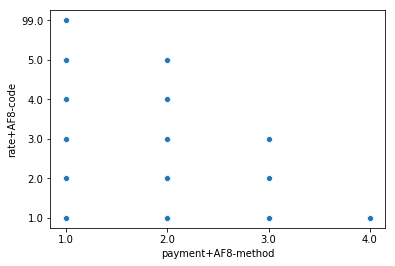

In [55]:
sns.scatterplot(X[:10000],Y[:10000])

In [0]:
X=df['toll+AF8-amount']

In [0]:
Y=df['pickup+AF8-loc']

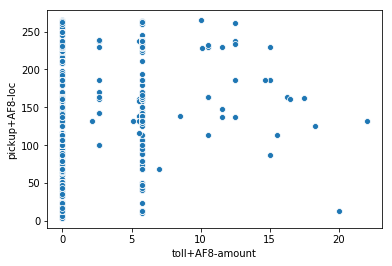

In [58]:
sns.scatterplot(X[:10000],Y[:10000])

In [0]:
X=df['loc']

In [0]:
Y=df['distance']

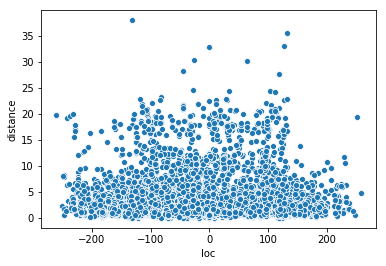

In [146]:
sns.scatterplot(X[:10000],Y[:10000])

## 2 Histograms

Histograms are drawn to observe whether the given dataset is uniform or not

If we find any feature as completely uniform we will drop that column



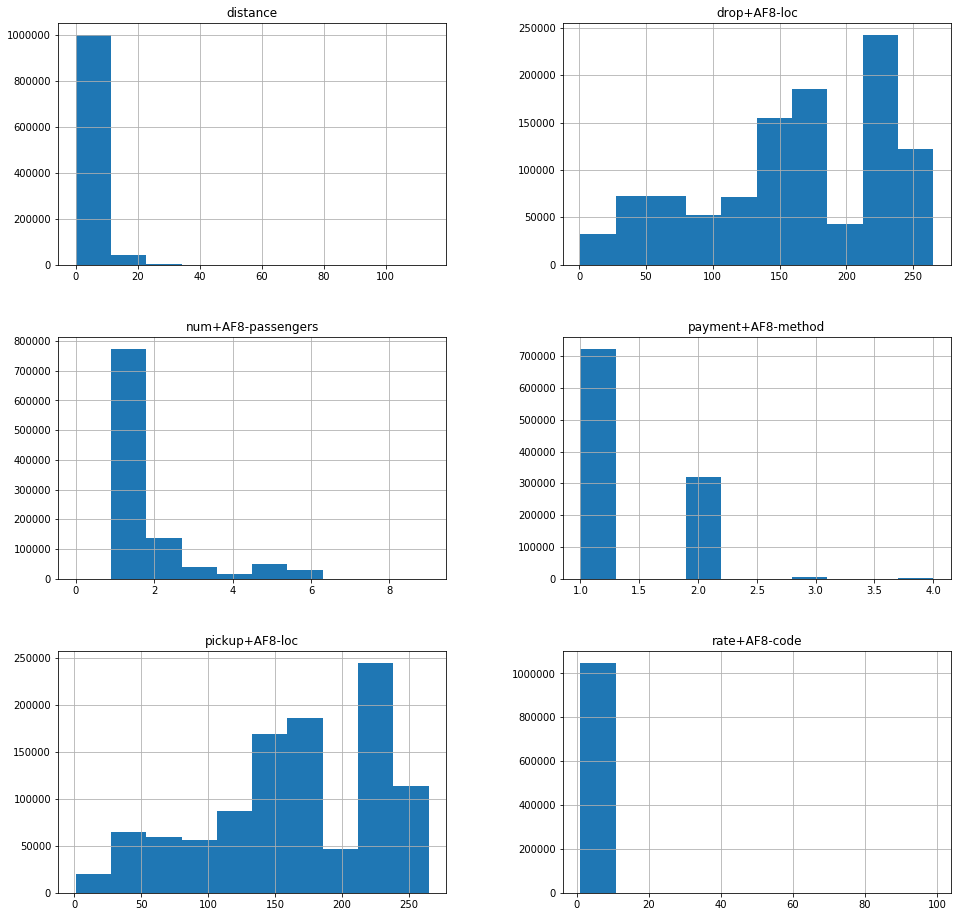

In [59]:
df.hist(figsize=(16,16))
plt.show()

## 3. HeatMap

Heatmap is used to find existing corelation among different columns, using different colurs

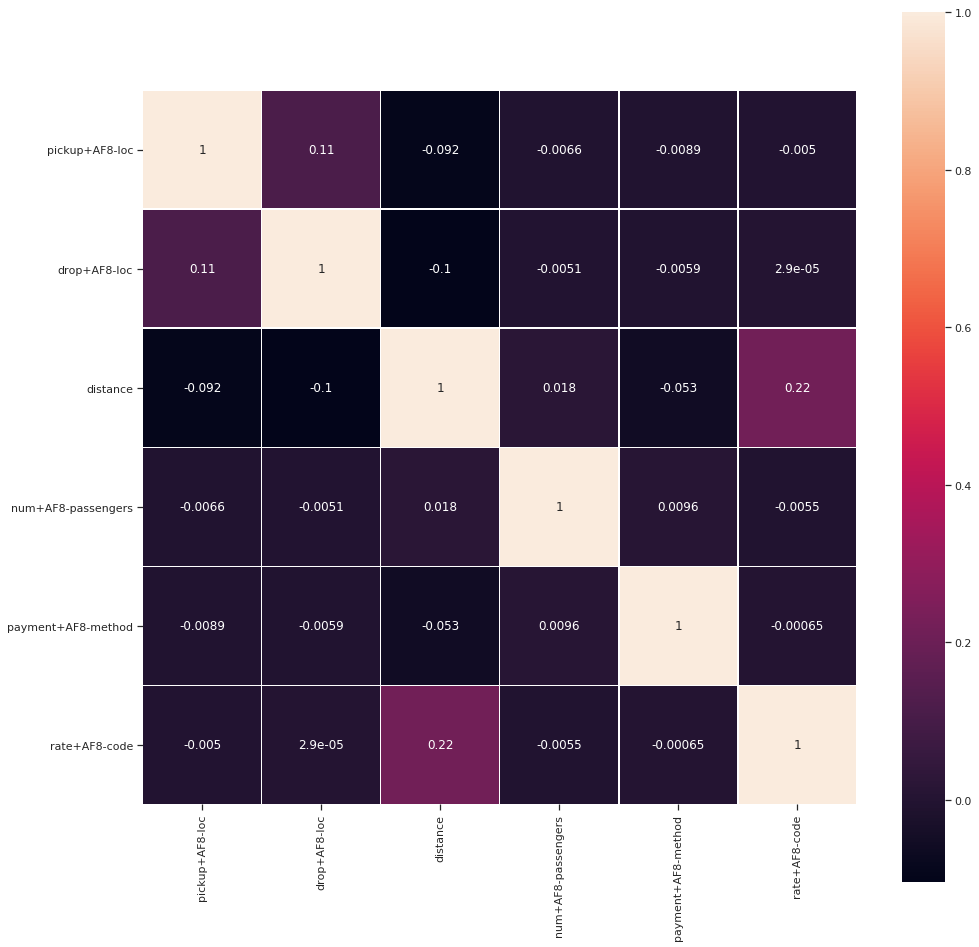

In [60]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(16,16))
corr=df.corr()
sns.set(style='ticks',color_codes=True)
sns.heatmap(corr,linewidths=0.3,square=True,linecolor='white',annot=True)
plt.show()

From all these graph we can make out that there is no significant relation between different columns of dataset so no changes are made

## Next Step

### Now, we use labelencoder to assign int32 values to object type

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
       le = LabelEncoder()        

In [0]:
xt['stored+AF8-flag'] = le.fit_transform(xt['stored+AF8-flag'].astype(str))

In [129]:
xt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048052 entries, 0 to 1048574
Data columns (total 11 columns):
vendor+AF8-id         1048052 non-null int64
loc                   1048052 non-null float64
charges               1048052 non-null float64
time                  1048052 non-null float64
driver+AF8-tip        1048052 non-null float64
distance              1048052 non-null float64
num+AF8-passengers    1048052 non-null float64
payment+AF8-method    1048052 non-null float64
rate+AF8-code         1048052 non-null float64
stored+AF8-flag       1048052 non-null int64
total+AF8-amount      1048052 non-null float64
dtypes: float64(9), int64(2)
memory usage: 96.0 MB


## Training


First step is to divide given training data in two parts training and testing


for this we use train_test_split of sklearn library

In [0]:
from sklearn.model_selection import train_test_split

In [130]:
fea=xt.iloc[:,:10]
fea.head()

,vendor+AF8-id,loc,charges,time,driver+AF8-tip,distance,num+AF8-passengers,payment+AF8-method,rate+AF8-code,stored+AF8-flag
0,1,63.0,0.45,0.089167,1.83,0.70,1.0,1.0,1.0,0
1,2,92.0,0.45,0.275000,3.56,4.64,1.0,1.0,1.0,0
2,2,22.0,0.20,0.104722,1.50,1.29,2.0,1.0,1.0,0
3,2,92.0,0.20,0.268889,1.50,2.74,1.0,1.0,1.0,0
4,2,0.0,0.20,0.045000,0.00,0.45,6.0,2.0,1.0,0


In [131]:
res=xt.iloc[:,10:]
res.head()

,total+AF8-amount
0,9.13
1,21.36
2,8.80
3,14.80
4,4.80


In [0]:
X_train,X_test,y_train,y_test = train_test_split(fea,res,test_size=0.3,random_state=0)

# Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
model1=LinearRegression()

In [0]:
model1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
pred1=model1.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
mean_squared_error(pred1,y_test)

44.08514352051672

In [0]:
from sklearn.metrics import mean_absolute_error

In [0]:
mean_absolute_error(pred1,y_test)

1.99139702888882

# RandomForestRegressor

In [0]:
from sklearn.ensemble import RandomForestRegressor 

In [0]:
model2=RandomForestRegressor(n_estimators=150,random_state=0,max_depth=8)

In [134]:
model2.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [0]:
pred2=model2.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error

In [136]:
mean_squared_error(pred2,y_test)

29.675429596668902

In [0]:
from sklearn.metrics import mean_absolute_error

In [108]:
mean_absolute_error(pred2,y_test)

0.9463185629844677

RandomForestRegressor with Principle Component Analysis

In [0]:
from sklearn.pipeline import Pipeline

In [0]:
from sklearn.decomposition import PCA

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
model3= Pipeline([('scl',StandardScaler()),('pca',PCA(n_components=8)),('clf',RandomForestRegressor(n_estimators=250))])

In [0]:
model3.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=8,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=250, n_jobs=None,
                                       oob_score=False, random_state=None,
                      

In [0]:
pred9=model3.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
mean_squared_error(pred9,y_test)

38.29471683542265

In [0]:
mean_absolute_error(pred9,y_test)

1.4528989348650359

# RandomForestRegressor with PCA and n_components=6

In [0]:
model4= Pipeline([('scl',StandardScaler()),('pca',PCA(n_components=6)),('clf',RandomForestRegressor(n_estimators=250))])

In [0]:
model4.fit(X_train,y_train)

NameError: ignored

In [0]:
pred4=model4.predict(X_test)

In [0]:
mean_squared_error(pred4,y_test)

In [0]:
mean_absolute_error(pred4,y_test)

### Use LabelEncoder with test file also

In [0]:
test['stored_flag']=le.fit_transform(test['stored_flag'].astype(str))

## prediction of answer using best model(RandomForestRegressor with PCA)

In [0]:
ans=model2.predict(test)

In [0]:
yy=[]

In [0]:
for i in range(154235):
    yy.append(i)

In [0]:
predi=pd.DataFrame(ans)
predi.rename(columns={0:'total_amount'},inplace=True)
predi['ID']=yy
predi = predi[['ID','total_amount']]

## Store predictions in .csv file

In [0]:
predi.to_csv('res_loc_cha.csv',index=False)

In [142]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [0]:
!cp res_loc_cha.csv drive/My\ Drive/